In [26]:
import pandas as pd
df=pd.read_csv('Predict Price of Airline Tickets.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [27]:
print(df.shape)
print(df.describe()) # Summary of num variables
df.info()

(10683, 11)
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [28]:
#data completeness
missing_value=df.isnull().sum()
print(missing_value)
print()
#remove missing value
df=df.dropna()
missing_value=df.isnull().sum()
print(missing_value)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [29]:
# check duplicates
duplicates = df[df.duplicated()]
print(df.shape)

if duplicates.empty:
    print("No Duplicates found:")
else:
    print("Duplicates found.")
    df.drop_duplicates(duplicates, inplace=True)

print(df.shape)


(10682, 11)
Duplicates found.
(10462, 11)


In [30]:
print (df["Total_Stops"].value_counts())

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64


In [31]:
#transformation
from sklearn.preprocessing import LabelEncoder

# create an instance of the scaler
le = LabelEncoder()

# fit and transform total stops
#4=>non stop
#1=>2stop
#0=>1stop
df['Total_Stops'] = le.fit_transform(df['Total_Stops'],)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,4,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,1,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,1,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,0,No info,13302


In [32]:
#confirmity
# Date_of_Journey
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

#Dep_Time
df["Dep_Time_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

#Arrival_Time
df["Arrival_Time_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Time_min"]= pd.to_datetime(df["Arrival_Time"]).dt.minute


# Now we can drop Dep_Time as it is of no use
df.drop(["Date_of_Journey"], axis = 1, inplace = True)
df.drop(["Arrival_Time"],axis = 1,inplace=True)
df.drop(["Dep_Time"],axis = 1,inplace = True)

df.head()

C:\Users\asram\AppData\Local\Temp\ipykernel_13556\1794891832.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Time_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
C:\Users\asram\AppData\Local\Temp\ipykernel_13556\1794891832.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
C:\Users\asram\AppData\Local\Temp\ipykernel_13556\1794891832.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Time_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
C:\Users\asram\AppData\Local\Temp\ipykernel_1355

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,4,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,1,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,1,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,0,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,0,No info,13302,1,3,16,50,21,35


In [33]:
# Split the duration column into hour and minute columns
df['Duration_hours'] = df['Duration'].str.extract('(\d+)h').fillna(0)
df['Duration_minutes'] = df['Duration'].str.extract('(\d+)m').fillna(0)
#drop old col
df.drop(["Duration"],axis = 1,inplace = True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR ? DEL,4,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,1,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,1,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,0,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,0,No info,13302,1,3,16,50,21,35,4,45


In [34]:
# Extract the number of stops from 'Route'
df['Stops'] = df['Route'].str.split(' ? ').str.len() - 1

# Create new columns for each stop
for i in range(1, 5):
    df[f'Stop_{i}'] = df['Route'].str.split(' ? ').str[i]

# Drop the original 'Route' column
df.drop('Route', axis=1, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['Airline', 'Source', 'Destination', 'Stop_1', 'Stop_2', 'Stop_3', 'Stop_4']
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [35]:
print(df["Additional_Info"].value_counts())
#drop addition info has high percentage no info
df.drop("Additional_Info", axis = 1,inplace=True)

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


In [36]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_minutes,Stops,Stop_1,Stop_2,Stop_3,Stop_4
0,3,0,5,4,3897,24,3,22,20,1,10,2,50,2,0,10,1,26
1,1,3,0,1,7662,1,5,5,50,13,15,7,25,6,0,20,0,1
2,4,2,1,1,13882,9,6,9,25,4,25,19,0,6,0,27,0,4
3,3,3,0,0,6218,12,5,18,5,23,30,5,25,4,0,29,0,3
4,3,0,5,0,13302,1,3,16,50,21,35,4,45,4,0,29,0,7


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop('Price', axis=1)
y = df['Price']
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Using multiple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
train_score = regressor.score(x_train, y_train)
test_score = regressor.score(x_test, y_test)
print("Multiple Linear Regression")
print("Training score:", train_score)
print("Testing score:", test_score)


Multiple Linear Regression
Training score: 0.4838632871394245
Testing score: 0.5095294214355695


In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)  # Adjust max_depth
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
train_score = regressor.score(x_train, y_train)
test_score = regressor.score(x_test, y_test)
print("Random Forest Regression")
print("Testing score:", test_score)

Random Forest Regression
Testing score: 0.8300582159678394


In [39]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.8300582159678394

In [40]:
from sklearn import metrics
import numpy as np
meanAbErr = metrics.mean_absolute_error(y_test,y_pred)
meanSqErr = metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('R squared: {:.2f}'.format(regressor.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R squared: 90.96
Mean Absolute Error: 1137.470243532742
Mean Square Error: 3581632.7625748706
Root Mean Square Error: 1892.5202145749647


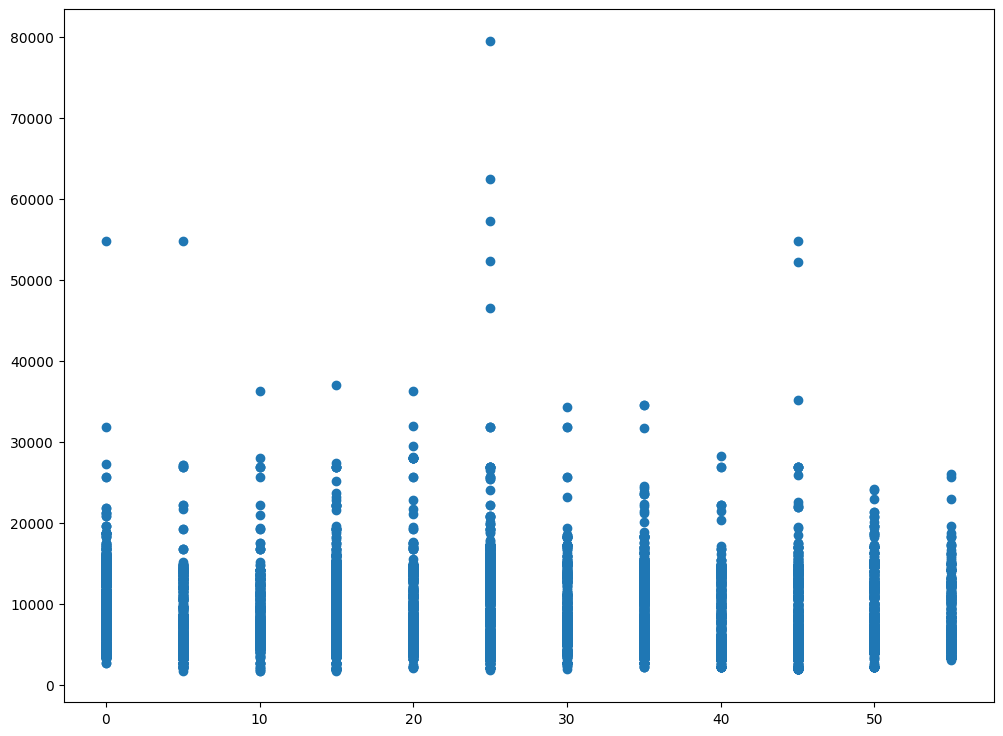

In [41]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (12.0, 9.0)
# Preprocessing Input data
X = df.iloc[:, 10]
Y = df.iloc[:, 4]
plt.scatter(X, Y)
plt.show()

In [42]:
# Building the model
m = -0.007728928210032099
# m=-120.40468864185941
c =13.654481219187097
# c=4447.826330665649

L = 0.001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

-23.502900953601966 9601.728584595852


In [43]:
from sklearn import metrics
import numpy as np
meanAbErr = metrics.mean_absolute_error(Y,Y_pred)
meanSqErr = metrics.mean_squared_error(Y,Y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(Y,Y_pred))
print('R squared: {:.2f}'.format(regressor.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)

R squared: 90.96
Mean Absolute Error: 3626.088896087274
Mean Square Error: 21228525.709849335
Root Mean Square Error: 4607.442426102505


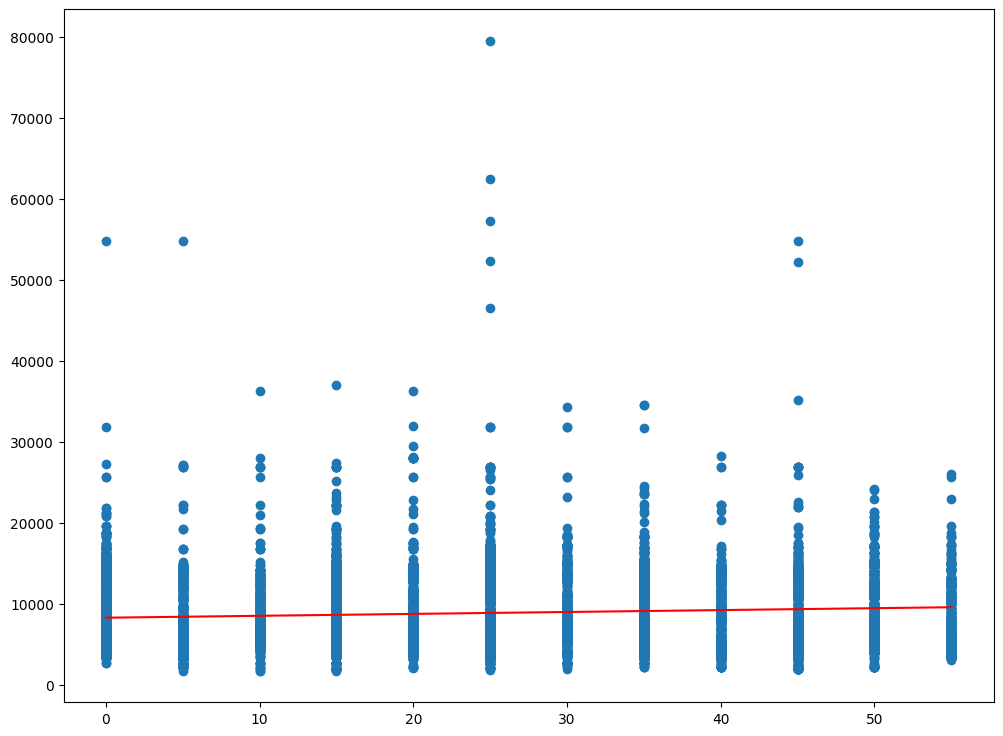

In [44]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

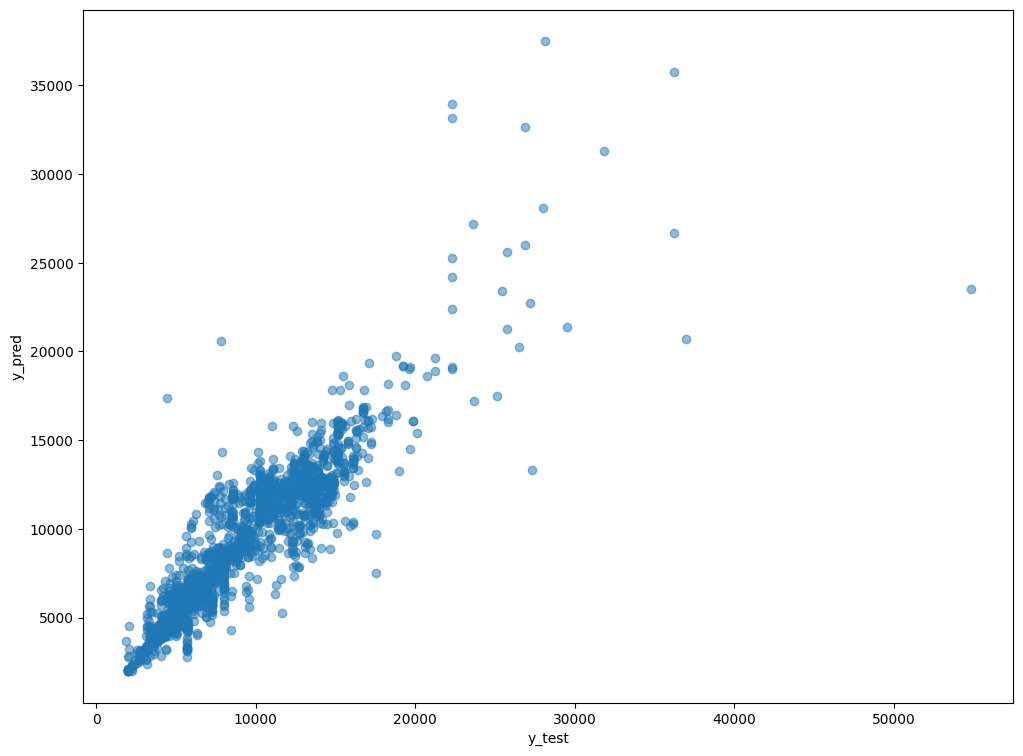

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()